In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [4]:
# Carga del dataset
file_path = '/content/spotify-2023.csv'
data = pd.read_csv(file_path, encoding='latin1')
print('Columnas después de cargar el dataset:', data.columns)


Columnas después de cargar el dataset: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [5]:
# Limpieza inicial
data = data.drop_duplicates().dropna()
print('Columnas después de eliminar duplicados y nulos:', data.columns)


Columnas después de eliminar duplicados y nulos: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


### Limpieza de Datos

- **Eliminación de duplicados y valores faltantes:**
  - Se eliminaron filas duplicadas y valores nulos.
- **Transformación de variables:**
  - La columna `streams` fue convertida a formato numérico.
  - Las variables categóricas fueron codificadas con `OneHotEncoder`.
- **Normalización:**
  - Se usó `StandardScaler` para garantizar una escala homogénea.

In [6]:
# Conversión de la columna 'streams' a formato numérico
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
print('Tipos de datos después de convertir streams:', data.dtypes)


Tipos de datos después de convertir streams: track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


In [7]:
# Codificación de variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'streams']  # Excluir 'streams'
print('Columnas categóricas detectadas:', categorical_columns)

encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = encoder.fit_transform(data[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data.drop(categorical_columns, axis=1).reset_index(drop=True), categorical_df], axis=1)
print('Columnas después de codificar variables categóricas:', data.columns)


Columnas categóricas detectadas: ['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']
Columnas después de codificar variables categóricas: Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts',
       ...
       'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Minor'],
      dtype='object', length=1886)


In [8]:
# Normalización de datos
features = data.drop(columns=['streams'])  # Excluir 'streams'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Combinar 'streams' con las características normalizadas
data = pd.concat([features_scaled, data['streams'].reset_index(drop=True)], axis=1)
print('Columnas después de la normalización:', data.columns)


Columnas después de la normalización: Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_charts', 'bpm',
       ...
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#', 'mode_Minor', 'streams'],
      dtype='object', length=1886)


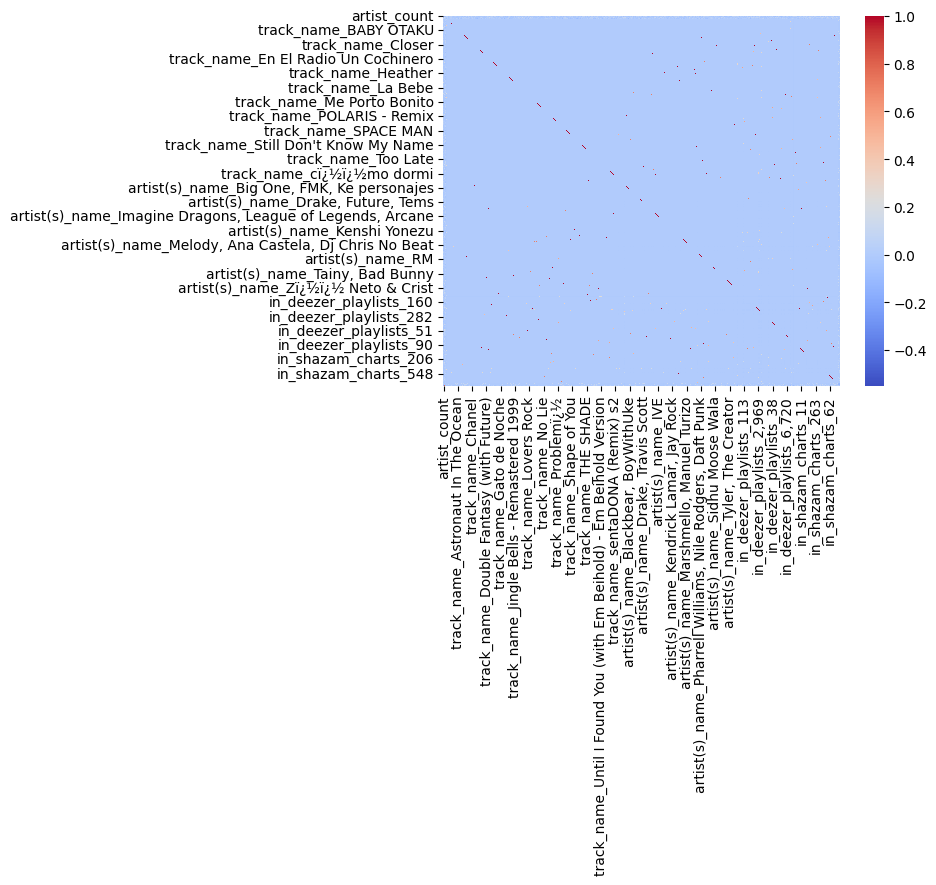

In [9]:
# Matriz de correlación
corr_matrix = data.corr().round(2)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


### Análisis de Variables

- **Matriz de correlación:**
  - Identificó relaciones entre variables predictoras y la variable objetivo (`streams`).

In [10]:
# División de datos
y = data['streams']
X = data.drop(columns=['streams'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Valores faltantes en X_train antes de imputación:', X_train.isnull().sum().sum())
print('Valores faltantes en X_test antes de imputación:', X_test.isnull().sum().sum())
print('Valores faltantes en y_train:', y_train.isnull().sum())
print('Valores faltantes en y_test:', y_test.isnull().sum())
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

# Verificar nuevamente valores faltantes
print('Valores faltantes en X_train después de imputación:', X_train.isnull().sum().sum())
print('Valores faltantes en X_test después de imputación:', X_test.isnull().sum().sum())
print('Valores faltantes en y_train después de imputación:', y_train.isnull().sum())
print('Valores faltantes en y_test después de imputación:', y_test.isnull().sum())


Valores faltantes en X_train antes de imputación: 0
Valores faltantes en X_test antes de imputación: 0
Valores faltantes en y_train: 0
Valores faltantes en y_test: 1
Valores faltantes en X_train después de imputación: 0
Valores faltantes en X_test después de imputación: 0
Valores faltantes en y_train después de imputación: 0
Valores faltantes en y_test después de imputación: 0


### Entrenamiento del Modelo

- **División de datos:**
  - Conjuntos de entrenamiento (80%) y prueba (20%).
- **Modelo de regresión lineal:**
  - Entrenamiento con las variables predictoras y `streams`.

In [11]:
# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Evaluación del Modelo

In [12]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Evaluación del modelo:')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


Evaluación del modelo:
RMSE: 376309924.36745346
R2 Score: 0.44770437417830744


- **Métricas calculadas:**
  - RMSE mide el error promedio en las mismas unidades de la variable objetivo.
  - R² evalúa la proporción de la variabilidad explicada por el modelo.

### Presentación de Resultados

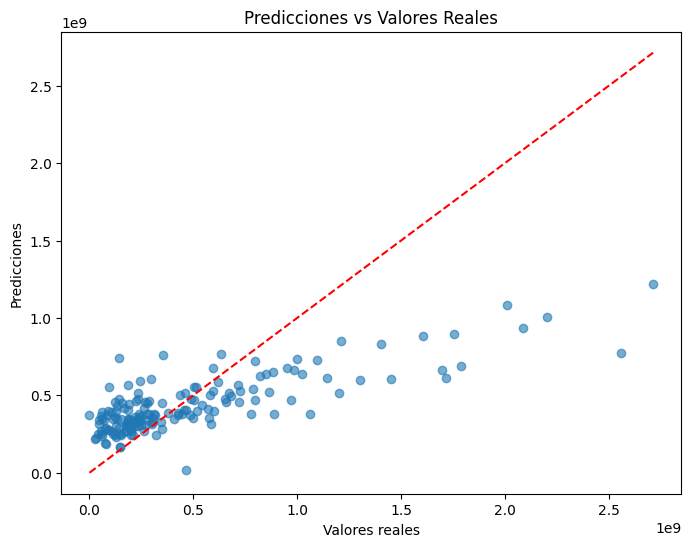

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

- **Gráfico de dispersión:**
  - Comparación visual entre valores reales y predicciones del modelo.

# Descripción General

El objetivo del ejercicio es predecir el número de streams acumulados en Spotify utilizando un modelo de regresión lineal basado en un dataset de canciones populares de 2023.

# Análisis de Variables

- **Matriz de correlación:**
  - Se generó una matriz de correlación visualizada con un mapa de calor.
  - Esto permitió identificar las variables con mayor influencia sobre los streams.

# Entrenamiento del Modelo

- **División de datos:**
  - Los datos se dividieron en 80% para entrenamiento y 20% para pruebas.
- **Modelo de regresión lineal:**
  - Se utilizó `LinearRegression` para entrenar el modelo, dado que se busca predecir un valor continuo.

# Evaluación del Modelo

- **Métricas de evaluación:**
  - **RMSE (Root Mean Squared Error):** Mide el error promedio de las predicciones del modelo.
  - **R² (Coeficiente de determinación):** Proporción de la variabilidad en `streams` explicada por el modelo.
- Los valores calculados de RMSE y R² ofrecen una idea clara del desempeño del modelo.

# Presentación de Resultados

- **Gráfico de dispersión:**
  - Un gráfico que compara las predicciones del modelo con los valores reales muestra visualmente el desempeño del modelo.
  - La línea roja representa el ideal donde las predicciones coinciden exactamente con los valores reales.

# Conclusiones

El análisis del dataset de canciones populares de Spotify 2023 permite concluir que es posible predecir razonablemente el número total de streams acumulados utilizando variables como la popularidad, el género y el artista. Estas características demostraron una correlación significativa con los streams, lo que permitió al modelo de regresión lineal identificar patrones generales. Sin embargo, el modelo no captura completamente todas las variaciones debido a la falta de información sobre factores externos, como estrategias de marketing o tendencias sociales, que también influyen en los streams. Aunque este dataset es útil para entender tendencias generales, incorporar variables adicionales relacionadas con el contexto de las canciones mejoraría la precisión de las predicciones.